<center> <h1>Introduction</h1> </center>

### The dataset, from the National Institute of Diabetes and Digestive and Kidney Diseases, aims to predict diabetes in patients using diagnostic measurements. It includes only female patients aged 21 or older of Pima Indian heritage, with several medical predictor variables and one target variable, **Outcome**.

<center><h1>Features Description</h1></center>

### **Pregnancies**: To express the Number of pregnancies

### **Glucose**: To express the Glucose level in blood

### **BloodPressure**: To express the Blood pressure measurement

### **SkinThickness**: To express the thickness of the skin

### **Insulin**: To express the Insulin level in blood

### **BMI**: To express the Body mass index

### **DiabetesPedigreeFunction**: To express the Diabetes percentage

### **Age**: To express the age

### **Outcome**: To express the final result 1 is Yes and 0 is No


<center><h1> Importing Libraries </h1></center>

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn

<center> <h1> Load Diabetes Dataset </h1> </center>

In [137]:
df = pd.read_csv('diabetes.csv')

<center> <h1> Exploratory Data Analysis on Diabetes Dataset </h1> </center>

In [138]:
print('\033[1mHead of the dataset:\033[0m\n', df.head(), '\n')
print('\033[1mShape of the dataset:\033[0m\n', df.shape, '\n')
print('\033[1mColumns in the dataset:\033[0m\n', df.columns, '\n')
print('\033[1mData types of the dataset:\033[0m\n', df.dtypes)
print('\033[1mStatistics of the dataset:\033[0m\n', df.describe().T, '\n')

Head of the dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Shape of the dataset:
 (768, 9) 

Columns in the dataset:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') 

Data types of the dataset:
 Pregnancies                  

<center>
    <h1>Correlation Between Features</h1>
</center>

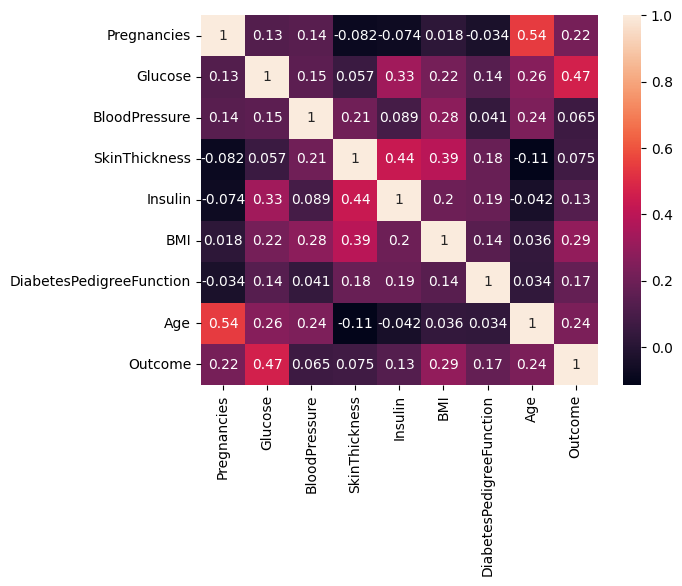

In [139]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()

### The following features have significant correlation with the target variable, Outcome:
### Pregnancies, Glucose, BMI, and Age.

### I want to see if I can get a better correlation with other features by fixing any 0's in the data that are supposed to have a nonzero value.

In [140]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Glucose, BloodPressure, SkinThickness, Insulin, and BMI should not have zero values. Let's look at the distribution of each of these variables to see how we will replace them.
<center> <h1> Data Visualization </h1></center>

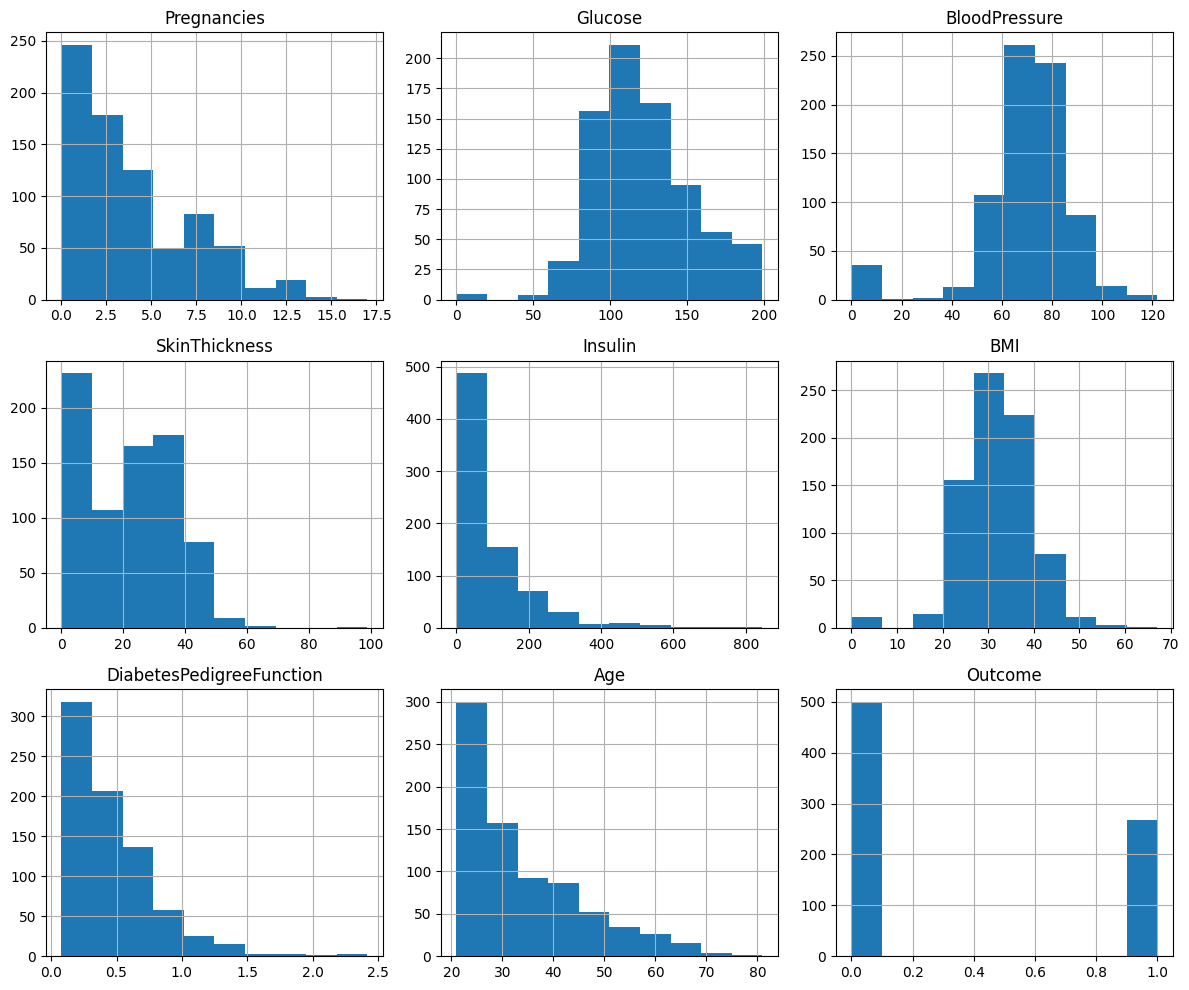

In [141]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Glucose, BloodPressure, and BMI has a normal distribution. I will replace the 0's with the mean of each feature. SkinThickness, and Insulin are skewed, so I will replace the 0's with the median of each feature.

In [142]:
for col in ['Glucose', 'BloodPressure', 'BMI']:
    mean_value = df[col][df[col] != 0].mean()
    df[col] = df[col].replace(0, mean_value)

for col in ['SkinThickness', 'Insulin']:
    median_value = df[col][df[col] != 0].median()
    df[col] = df[col].replace(0, median_value)

### Now let's look at the correlation between the features.

Text(0.5, 1.0, 'Correlation Matrix After Replacement')

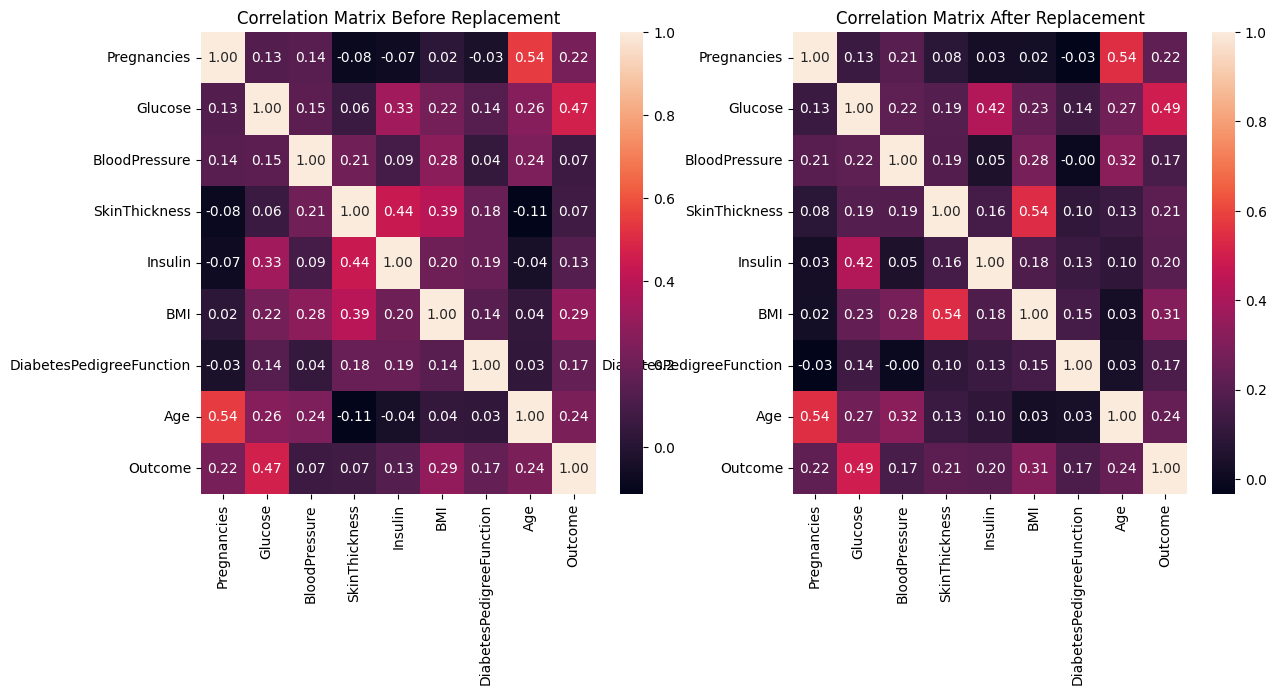

In [143]:
corrnew = df.corr()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(corr, annot=True, fmt=".2f",ax=axes[0])
axes[0].set_title('Correlation Matrix Before Replacement')

sns.heatmap(corrnew, annot=True, fmt=".2f",ax=axes[1])
axes[1].set_title('Correlation Matrix After Replacement')

### After replacing the zeros, we can see that the correlation between these features and the target has increased.
### Glucose increased by 0.02
### SkinThickness increased by 0.14
### Insulin increased by 0.07
### BMI increased by 0.02

<center>
<h1> Outcome Results </h1>
</center>>

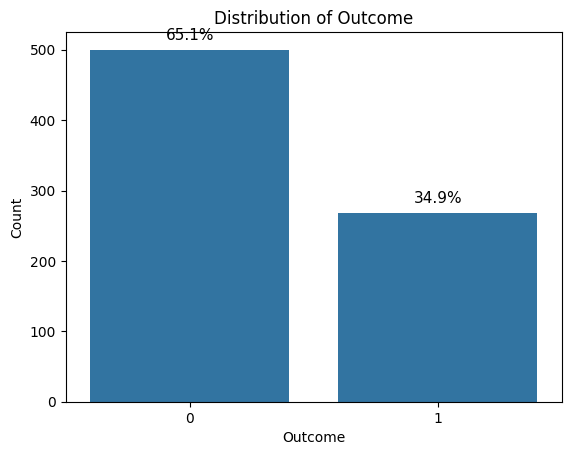

In [144]:
ax = sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Add percentage labels on top of bars
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

### We can see that most of the patients do not have diabetes (63.2%) whereas the rest do (36.8%).
### Let's see a visualization of the features vs the Outcome.
<center>
<h1> Features vs Outcome </h1>
</center>

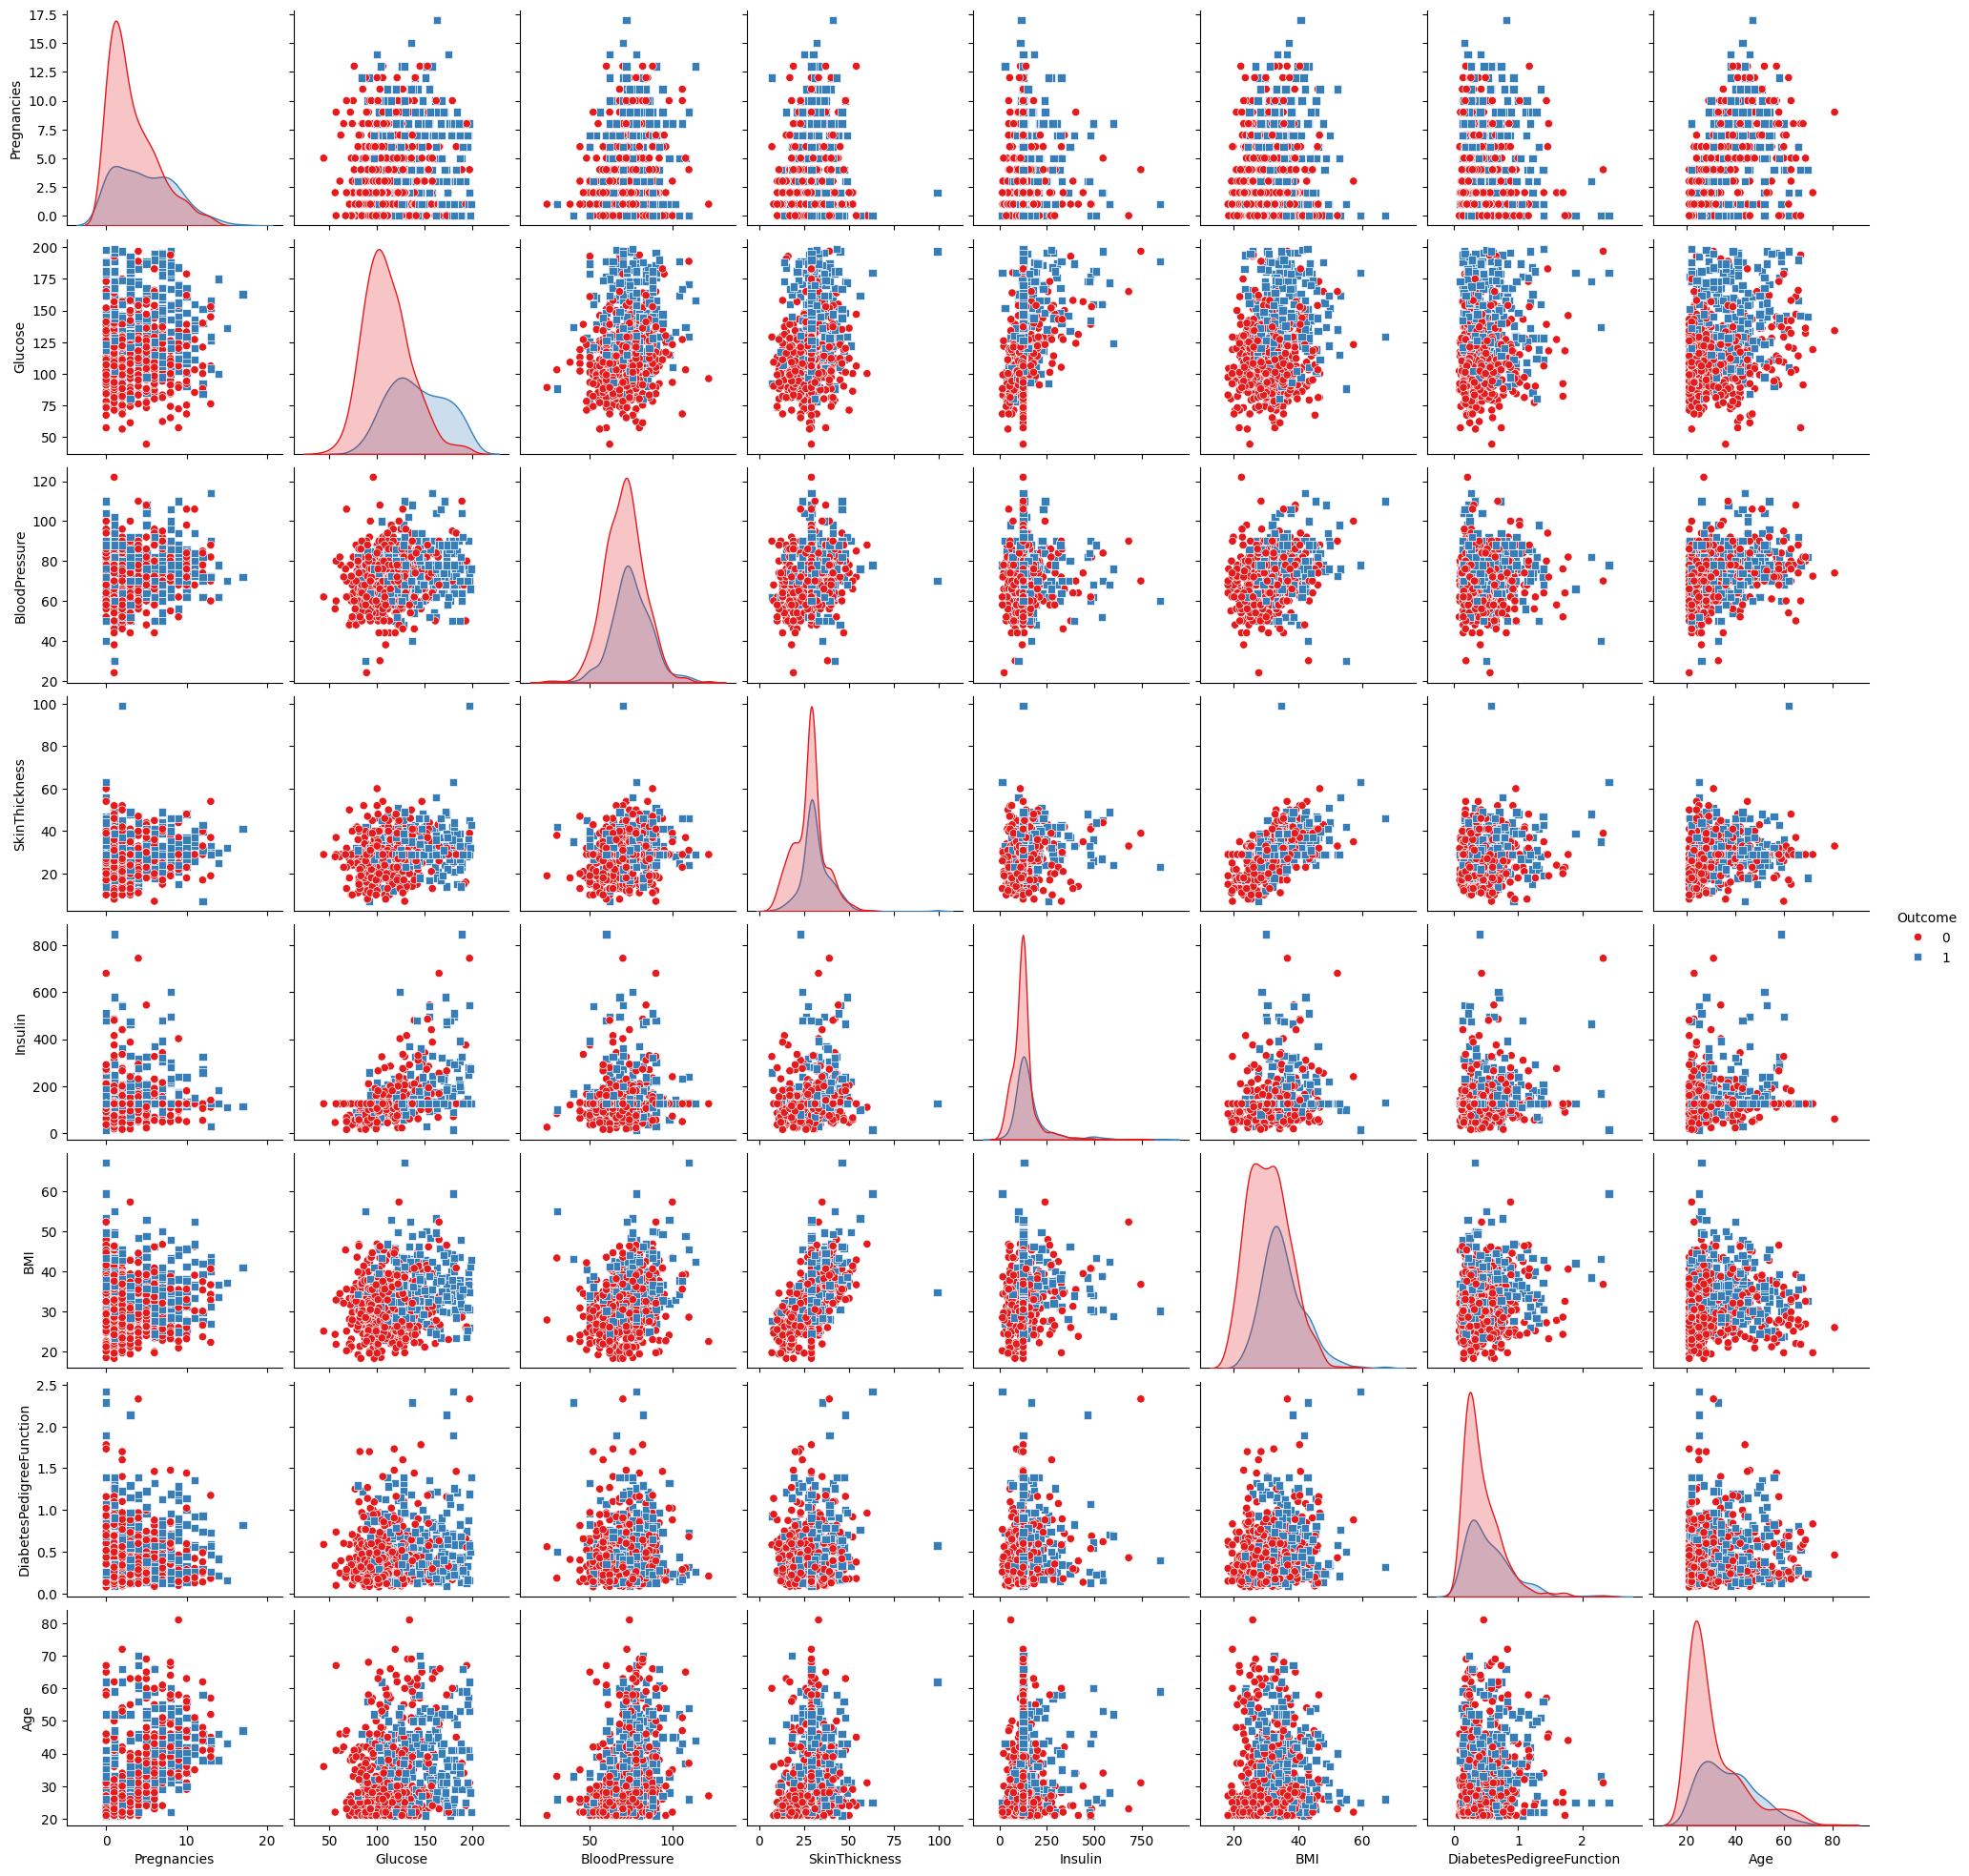

In [145]:
featuresvsoutcome = sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], palette="Set1")

### After seeing the pairplots, I can separate the data into two groups: those who had a positive outcome and those who had a negative outcome. Since I will be classifying the data, I will use two types of models: Logistic Regression and K-Nearest Neighbors.
<center>
<h1> Scaling the Data </h1>
</center>

### Before I train my models, I need to scale my data.

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop('Outcome', axis=1)), columns=df.columns[:-1])
y = df['Outcome']


<center>
<h1> Splitting Date Into Training and Testing </h1>
</center>

In [147]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=43)

### To quanitfy the effeciency of my models, I will measure the accuracy, recall, F1 score, and AUC of my models.
### **Accuracy:** Accuracy measures the proportion of all predictions that the model classified correctly. It reflects how many cases were correctly identified out of the total number of cases.
### **Recall:** Recall measures the ability of the model to correctly identify patients who actually have diabetes. It is the proportion of true diabetic cases that are successfully detected by the model.
### **Precision:** Precision measures the proportion of cases predicted as diabetic that are actually true positives. It reflects how accurate the model's positive predictions are for diabetes.
### **F1 Score:** F1 score is the harmonic mean of precision and recall. It offers a balanced metric that considers both false positives and false negatives, providing an overall assessment of the model’s performance.
### **AUC (Area Under the Curve):** AUC measures the area under the Receiver Operating Characteristic (ROC) curve. It indicates how well the model can distinguish between classes, providing an overall evaluation of its classification performance.

<center>
<h1> Logistic Regression </h1>
</center>

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Create and train the Logistic Regression model

lr = LogisticRegression()
lr.fit(X_train,y_train)

# Predict on the test set
lr_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy_lr = round(accuracy_score(y_test, lr_pred), 4)
recall_lr = round(sk.metrics.recall_score(y_test, lr_pred), 4)
precision_lr = round(sk.metrics.precision_score(y_test, lr_pred), 4)
F1_lr = round(sk.metrics.f1_score(y_test, lr_pred), 4)
AUC_lr = round(roc_auc_score(y_test, lr_pred), 4)

In [150]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr}")
print(f"Recall: {recall_lr}")
print(f"Precision: {precision_lr}")
print(f"F1: {F1_lr}")
print(f"AUC: {AUC_lr}")

Logistic Regression:
Accuracy: 0.8009
Recall: 0.5823
Precision: 0.7797
F1: 0.6667
AUC: 0.7484


<center>
<h1> K-Nearest Neighbors (KNN) </h1>
</center>

In [163]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the K-Nearest Neighbors model with k=15

knn_model = KNeighborsClassifier(15)
knn_model.fit(X_train, y_train)

# Predict on the test set

knn_pred = knn_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_knn = round(accuracy_score(y_test, knn_pred), 4)
recall_knn = round(sk.metrics.recall_score(y_test, knn_pred), 4)
precision_knn = round(sk.metrics.precision_score(y_test, knn_pred), 4)
F1_knn = round(sk.metrics.f1_score(y_test, knn_pred), 4)
AUC_knn = round(roc_auc_score(y_test, knn_pred), 4)

In [164]:
print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_knn}")
print(f"Recall: {recall_knn}")
print(f"Precision: {precision_knn}")
print(f"F1: {F1_knn}")
print(f"AUC: {AUC_knn}")

K-Nearest Neighbors (KNN):
Accuracy: 0.7879
Recall: 0.5949
Precision: 0.7344
F1: 0.6573
AUC: 0.7415


<center>
<h1> Compare Metrics of Both Models </h1>
</center>

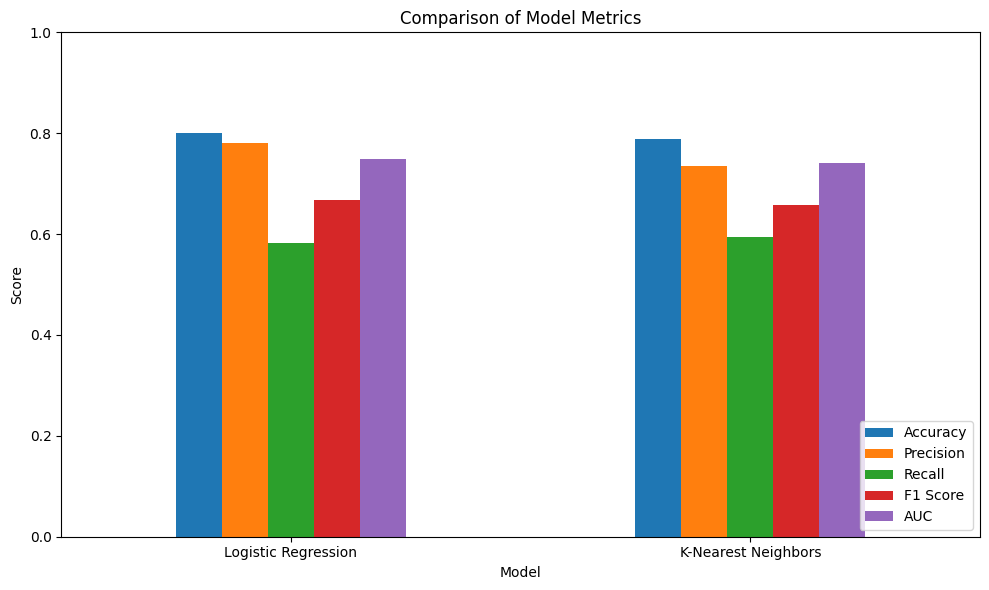

In [170]:
metrics = {
    "Model": ["Logistic Regression", "K-Nearest Neighbors"],
    "Accuracy": [accuracy_lr, accuracy_knn],
    "Precision": [precision_lr, precision_knn],
    "Recall": [recall_lr, recall_knn],
    "F1 Score": [F1_lr, F1_knn],
    "AUC": [AUC_lr, AUC_knn]
}

metrics_df = pd.DataFrame(metrics)

# Set the model names as index
metrics_df.set_index("Model", inplace=True)

# Plot the metrics as a barplot (excluding the index)
metrics_df.plot(kind="bar", figsize=(10,6))
plt.title("Comparison of Model Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


<center>
<h1> Conclusion </h1>
</center>

### Given the results of the analysis, I would say that Logistic Regression is the best model of the two to predict the outcome of the diabetes. The accuracy of the Logistic Regression model was 80.1% where as the accuracy of the KNN model was 78.8%. The Logistic Regression model did slightly worse than the KNN model in identifying patients who actually have diabetes. About 0.01% worse. However, the Logistic Regression model was able diagnose patients with a true positive better than the KNN model. Also, when consdiering both false positives and false negatives, the Logistic Regression model was more accurate than the KNN model. 

